# Задача 1. Центральная предельная теорема

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение. Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

Для нескольких значений `n` (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. 

**Обратите внимание:** для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Решение должно представлять собой IPython-ноутбук, содержащий:

* код, генерирующий выборки и графики;
* краткие описания каждого блока кода, объясняющие, что он делает;
* необходимые графики (убедитесь, что на них подписаны оси);
* выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
* выводы по результатам выполнения задания.

# Гистограмма выборки и теоретическая плотность распределения случайной велечины Лапласа

$$ f(x) = {\frac{1}{2}} exp^{-|x|}   $$

In [1]:
#подлючение необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [7]:
#распределения Лапласа
a = 1.0
b = 5.0

#freeze the distribution
laplace_rv = stats.laplace(b, scale=a)

#генерация выборки
sample_laplace = laplace_rv.rvs(1000)

#генерация плотности вероятности
x_1 = np.linspace(-2.5, 12.5, 1000)
laplace_pdf = laplace_rv.pdf(x_1)

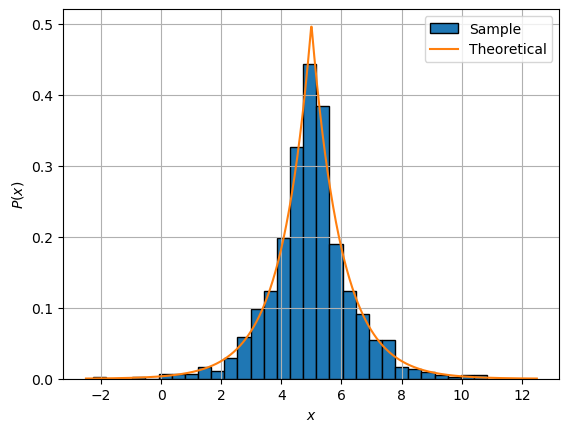

In [65]:
#построение графика

#гистограмма sample
plt.hist(sample_laplace, bins=30, density=True, label='Sample',edgecolor='black')

#theoretical pdf
plt.plot(x_1, laplace_pdf, label='Theoretical' )

#метки осей x и y
plt.xlabel('$x$')
plt.ylabel('$P(x)$')

#вывод сетки и легенды
plt.grid()
plt.legend()

# Распределение выборочных средних

In [19]:
#функция генерации 1000 выборок объема n
def generate_sample(n):
    mean = []
    for i in np.arange(1000):
        sample = laplace_rv.rvs(n) #создание выборки объема n
        mean.append(np.mean(sample)) #запись выборочных средних значений
    return mean

In [20]:
#функция генерации параметров нормального распределения 
def generate_clt(n, x):
    mu = b #математическое ожидание
    s = np.sqrt(2/(n*a**2)) #среднеквадратичное отколонение 
    norm_rv = stats.norm(loc=mu, scale=s) 
    norm_pdf = norm_rv.pdf(x) 
    return norm_pdf

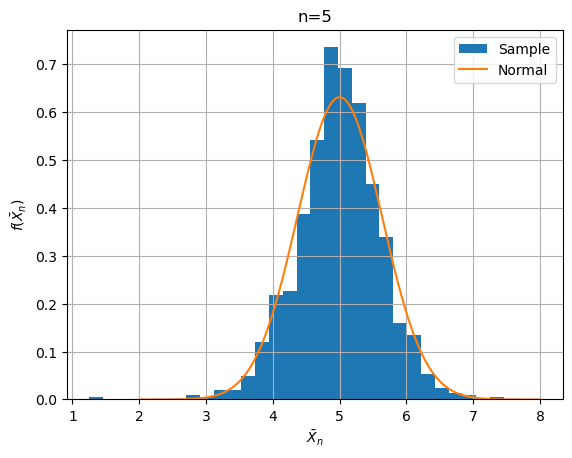

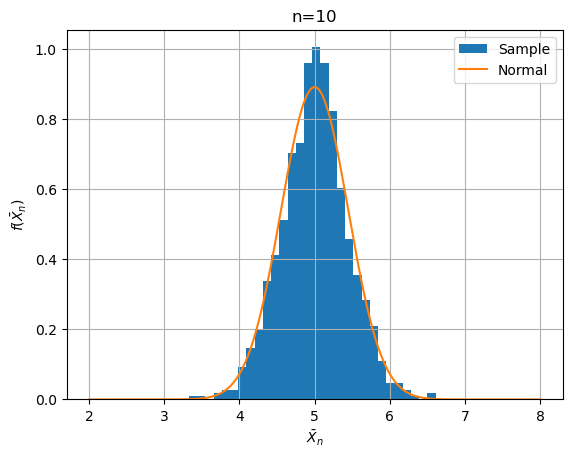

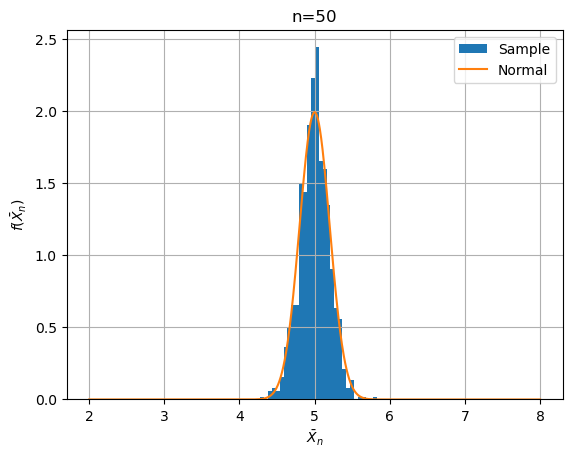

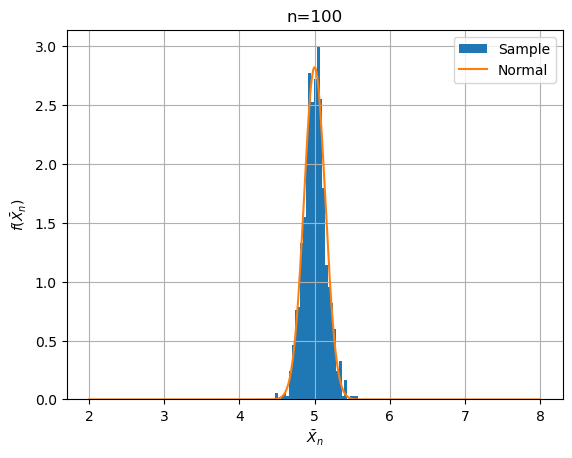

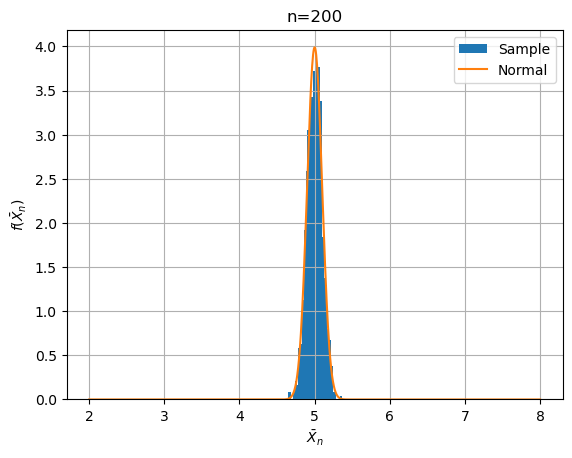

In [68]:
#выборка
n = [5, 10, 50, 100, 200]

#построение графиков
for i in n:
    x_2 = np.linspace(2, 8, 1000)
    plt.hist(generate_sample(i), bins=30, density=True, label='Sample')
    plt.plot(x_2, generate_clt(i, x_2), label='Normal')
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n=%d' %i)
    plt.grid()
    plt.legend()
    plt.show()

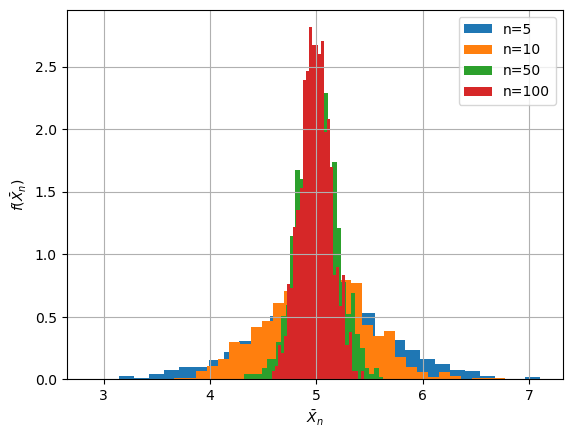

In [70]:
#построение гистограмм 
for i in [5, 10, 50, 100]:
    plt.hist(generate_sample(i), bins=30, density=True, label='n=%d' %i)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.legend()
    plt.grid(True)

# Вывод
Из графиков следует, что с увеличением объема выборки n график распределения выборочных средних приближается к нормальному распределеню (от n=50 график имеет приближенный вид нормального распределения), следовательно утвержедние центральной теоремы справедливо.

С ростом n точность нормальной аппроксимации увеличивается, среднеквадратичное отклонение выборочных средних значений уменьшается